In [2]:
!pip install pyss3

You should consider upgrading via the 'c:\users\feris\anaconda3\python.exe -m pip install --upgrade pip' command.


In [209]:

import re
import pandas as pd
from pyss3 import SS3
import pickle
import seaborn as sn

from pyss3.util import Dataset, Evaluation, span
from pyss3.server import Live_Test
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split

# Carga y preprocesamiento de Data

In [207]:
Predict=pd.read_csv('Data/Test/pruebatest.csv',engine='python')
Data=pd.read_csv('Data/Train/pruebatrain.csv',engine='python')

In [33]:
X_train, X_test, Y_train, Y_test= train_test_split(Data["tweetstop"],Data["Depressed"],test_size=.2, random_state=54)

In [68]:
print("Numero de Datos",Data.shape[0])
print("Numero de tweets con depresion",Data["Depressed"].sum(),"Porcentaje",Data["Depressed"].sum()/Data.shape[0])
print("Numero de tweets sin depresion",Data.shape[0]-Data["Depressed"].sum(),"Porcentaje",(Data.shape[0]-Data["Depressed"].sum())/Data.shape[0])

Numero de Datos 10190
Numero de tweets con depresion 5066.0 Porcentaje 0.4971540726202159
Numero de tweets sin depresion 5124.0 Porcentaje 0.5028459273797841


In [35]:
#Para el pre procesamiento se utilizara un simple stemming
stemmer = SnowballStemmer('english')

def stem(match):
    return stemmer.stem(match.group(0))

def my_preprocessing(text):
    return re.sub(r"\w+", stem, text)

In [44]:
x_train_prep = [my_preprocessing(str(X_train.iloc[i])) for i in range(X_train.size)]
x_test_prep = [my_preprocessing(str(X_test.iloc[i])) for i in range(X_test.size)]

# Entrenamiento de Modelo y busqueda de hyperparametros

In [214]:
clf = SS3(s=.2, l=.1, p=.5)
clf.train(x_train_prep, Y_train, n_grams=3, prep=False)

### Recall =$\frac{TP}{TP+FN}$
### Precision =$\frac{TP}{TP+FP}$
### Accuracy=$\frac{TP+TN}{TP+FN+TN+FP}$
TP= True Positive, 
TN= True Negative,
FP= False Positive, 
FN= False Negative

Accuracy was: 0.7168792934249264
Recall : 0.7089898053753475
Precision : 0.7441634241245136


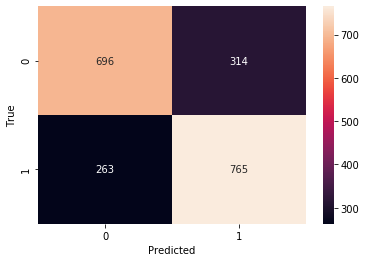

In [215]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test_prep, prep=False)
accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy was:", accuracy)
print("Recall :",recall_score(y_pred,Y_test))
print("Precision :",precision_score(y_pred,Y_test))
C=confusion_matrix(Y_test, y_pred)
sn.heatmap(C, annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [216]:
clf = SS3(s=.3, l=.5, p=.4)
clf.train(x_train_prep, Y_train, n_grams=3, prep=False)

Accuracy was: 0.7855740922473012
Recall : 0.9191489361702128
Precision : 0.6303501945525292


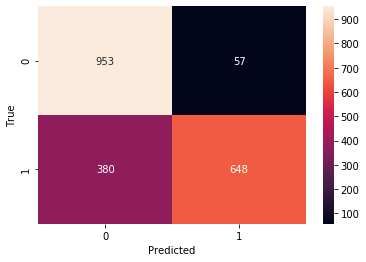

In [217]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test_prep, prep=False)
accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy was:", accuracy)
print("Recall :",recall_score(y_pred,Y_test))
print("Precision :",precision_score(y_pred,Y_test))
C=confusion_matrix(Y_test, y_pred)
sn.heatmap(C, annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [218]:
clf = SS3(s=.5, l=.4, p=.6)

clf.train(x_train_prep, Y_train, n_grams=3, prep=False)

Accuracy was: 0.7154072620215898
Recall : 0.9426877470355731
Precision : 0.46400778210116733


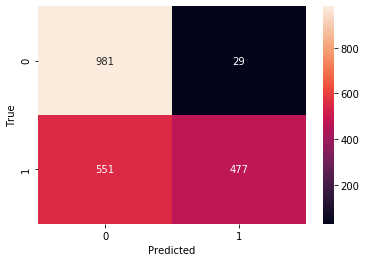

In [219]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test_prep, prep=False)
accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy was:", accuracy)
print("Recall :",recall_score(y_pred,Y_test))
print("Precision :",precision_score(y_pred,Y_test))
C=confusion_matrix(Y_test, y_pred)
sn.heatmap(C, annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [220]:
clf = SS3(s=.25, l=.5, p=.5)

clf.train(x_train_prep, Y_train, n_grams=3, prep=False)

Accuracy was: 0.8400392541707556
Recall : 0.8926174496644296
Precision : 0.7762645914396887


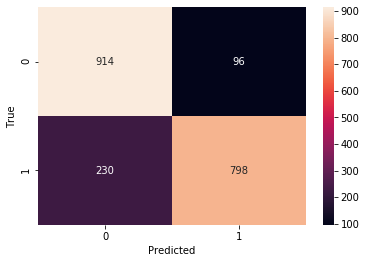

In [221]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test_prep, prep=False)
accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy was:", accuracy)
print("Recall :",recall_score(y_pred,Y_test))
print("Precision :",precision_score(y_pred,Y_test))
C=confusion_matrix(Y_test, y_pred)
sn.heatmap(C, annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [222]:
clf = SS3(s=.25, l=.4, p=.55)

clf.train(x_train_prep, Y_train, n_grams=3, prep=False)

Accuracy was: 0.8258096172718351
Recall : 0.8899188876013905
Precision : 0.7470817120622568


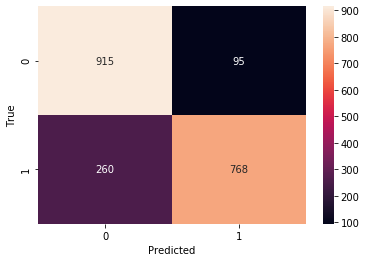

In [223]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test_prep, prep=False)
accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy was:", accuracy)
print("Recall :",recall_score(y_pred,Y_test))
print("Precision :",precision_score(y_pred,Y_test))
C=confusion_matrix(Y_test, y_pred)
sn.heatmap(C, annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [230]:
clf = SS3(s=.25, l=.4, p=.1)

clf.train(x_train_prep, Y_train, n_grams=3, prep=False)

Accuracy was: 0.8258096172718351
Recall : 0.8899188876013905
Precision : 0.7470817120622568


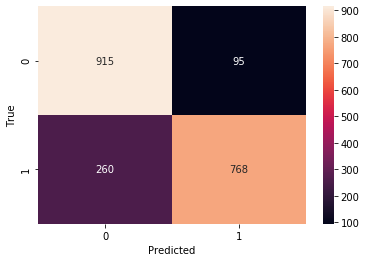

In [231]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test_prep, prep=False)
accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy was:", accuracy)
print("Recall :",recall_score(y_pred,Y_test))
print("Precision :",precision_score(y_pred,Y_test))
C=confusion_matrix(Y_test, y_pred)
sn.heatmap(C, annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Se guarda Mejor Modelo

Accuracy was: 0.8400392541707556
Recall : 0.8926174496644296
Precision : 0.7762645914396887


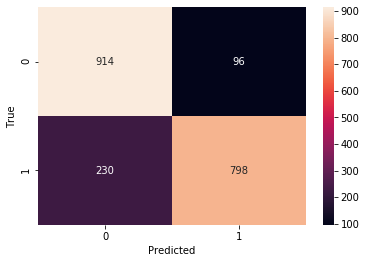

In [224]:
clf = SS3(s=.25, l=.5, p=.5)
clf.train(x_train_prep, Y_train, n_grams=3, prep=False)
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test_prep, prep=False)
accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy was:", accuracy)
print("Recall :",recall_score(y_pred,Y_test))
print("Precision :",precision_score(y_pred,Y_test))
C=confusion_matrix(Y_test, y_pred)
sn.heatmap(C, annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [147]:
print(Predict.iloc[2][0])
#Si tiene depresión marcara un 1
clf.predict(Predict.iloc[2])

hello beautiful blue sky goodbye revision work


[0.0]

In [148]:
print(Predict.iloc[3][0])
#Si tiene depresión marcara un 1
clf.predict(Predict.iloc[3])

ahhh happy


[0.0]

In [153]:
print(Predict.iloc[1][0])
#Si tiene depresión marcara un 1
clf.predict(Predict.iloc[1])

love depressiondespair serious reality chemically andor philosophically youre youre alone life matters 


[1.0]

In [154]:
save_classifier = open("Models/SS3.pickle","wb")
pickle.dump(clf, save_classifier)
save_classifier.close()